In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import seaborn as sns
import plotly.express as px
import numpy as np
from wordcloud import WordCloud
from PIL import Image
sns.set(color_codes = True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#reading the data set
data_df = pd.read_csv("data/cleaned_data.csv")

In [3]:
data_df.describe()

,rate,votes,cost_for_two
count,9373.000000,9373.000000,9373.00000
mean,3.626342,243.240905,536.06412
std,0.431440,680.360661,425.77651
min,1.800000,0.000000,40.00000
25%,3.300000,16.000000,300.00000
50%,3.700000,53.000000,400.00000
75%,3.900000,190.000000,600.00000
max,4.900000,16832.000000,6000.00000


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9373 entries, 0 to 9372
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         9373 non-null   object 
 1   name            9373 non-null   object 
 2   online_order    9373 non-null   object 
 3   book_table      9373 non-null   object 
 4   rate            9373 non-null   float64
 5   votes           9373 non-null   int64  
 6   location        9373 non-null   object 
 7   rest_type       9373 non-null   object 
 8   dish_reviewed   4612 non-null   object 
 9   cuisines        9369 non-null   object 
 10  cost_for_two    9373 non-null   float64
 11  reviews_list    9079 non-null   object 
 12  menu_item       6352 non-null   object 
 13  listed_as       9373 non-null   object 
 14  listed_in_city  9373 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data_df.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_reviewed,cuisines,cost_for_two,reviews_list,menu_item,listed_as,listed_in_city
0,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,lunch curry momos biryani nirvana buffet thai ...,chinese north indian thai,800.0,dinner family turned good choose suitable ages...,gobi stir lahori chilli firdausi mushroom bro...,delivery buffet,banashankari
1,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,dosa masala,north indian south indian,300.0,great proper karnataka style full meals twice ...,masala dosa,dine-out buffet,banashankari
2,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,gol gappe panipuri,north indian rajasthani,600.0,good restaurant neighbourhood buffet system pr...,gol gappe panipuri,buffet,banashankari
3,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NaN,north indian chinese andhra south indian,800.0,awesome great servicefriendly staffsgood quali...,NaN,buffet,banashankari
4,"12,29 Near PES University Back Gate, D'Souza N...",Caf Down The Alley,Yes,No,4.1,402,Banashankari,Cafe,chilli honey pasta crispy sandwich chicken cre...,cafe,500.0,ended saturday afternoon hectic day good ambie...,chilli mushroom brownie fries pakoda fresh pe...,cafes dine-out,banashankari


In [6]:
data_df.shape

(9373, 15)

In [7]:
data_df.dtypes

address            object
name               object
online_order       object
book_table         object
rate              float64
votes               int64
location           object
rest_type          object
dish_reviewed      object
cuisines           object
cost_for_two      float64
reviews_list       object
menu_item          object
listed_as          object
listed_in_city     object
dtype: object

Checking the distribution of ratings

3.626341619545518


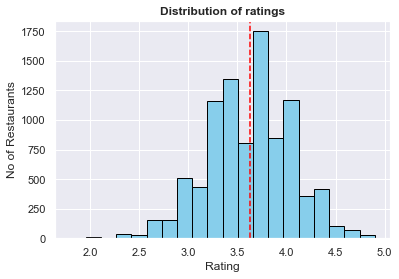

In [8]:
plt.hist(data_df['rate'], color = 'skyblue', edgecolor = 'black',bins = int(100/5))
plt.axvline(x = data_df['rate'].mean(),ls='--',color='red')
plt.title('Distribution of ratings',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data_df['rate'].mean())
plt.show()

Converting online order and book table columns to binary variables to check for correlation.

In [9]:
data_df.online_order.replace(('Yes','No'),(1, 0),inplace=True)
data_df.book_table.replace(('Yes','No'),(1, 0),inplace=True)
data_df.dtypes

address            object
name               object
online_order        int64
book_table          int64
rate              float64
votes               int64
location           object
rest_type          object
dish_reviewed      object
cuisines           object
cost_for_two      float64
reviews_list       object
menu_item          object
listed_as          object
listed_in_city     object
dtype: object

Checking correlation between variables.

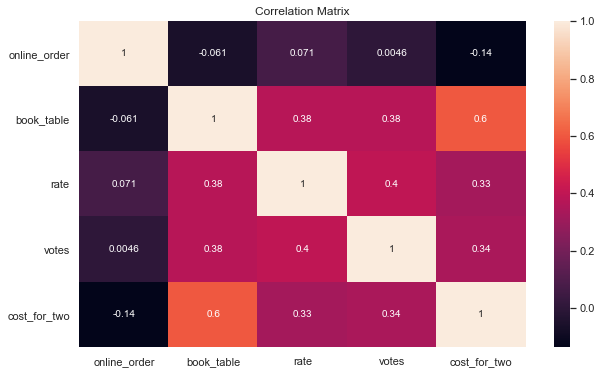

In [10]:
heat_corr = data_df.corr()
plt.figure(figsize=(10, 6))
corr_matrix = sns.heatmap(heat_corr, annot=True)
corr_matrix.set_yticklabels(corr_matrix.get_yticklabels(), rotation=360)

plt.title("Correlation Matrix")
plt.show()

Checking relation between votes and rating

In [11]:
mean_ratings = data_df.groupby(['name'], as_index=False)['rate','votes'].mean()
mean_ratings.columns=['name','mean_rating','mean_votes']
mean_ratings = mean_ratings.sort_values("mean_rating", ascending=False)
top_20 = mean_ratings.head(20)

Text(-8.449999999999996, 0.5, 'No of Votes')

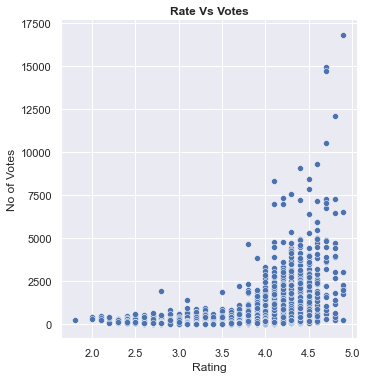

In [12]:
sns.relplot(x="rate", y="votes", data=data_df)
plt.title('Rate Vs Votes',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Votes')

From the above plot, we can see that most number of votes are registered for restaurents with highest rating. We can say that the more people are visiting the restaurents with higher rating.

Checking the trends for cost based on restaurent type.

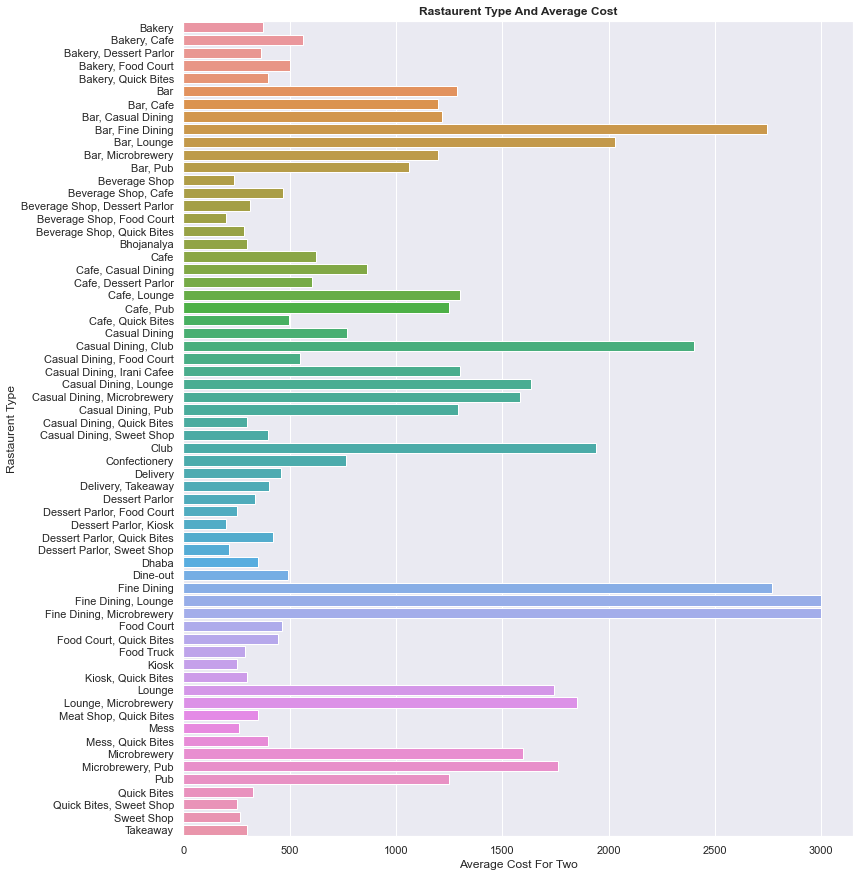

In [13]:
mean_costs = data_df.groupby(['rest_type'], as_index=False)['rate','cost_for_two'].mean()
mean_costs.columns=['rest_type','rating','cost_for_two']

plt.figure(figsize=(12, 15))
sns.barplot(x="cost_for_two", y="rest_type", data=mean_costs,orient='h')
plt.title('Rastaurent Type And Average Cost',weight='bold')
plt.ylabel('Rastaurent Type')
plt.xlabel('Average Cost For Two')
plt.show()

Dine-out, Fine Dining, Lounge, Casual Dining are the restuarents types that are costly.

Checking what type of restuarent are most visited.

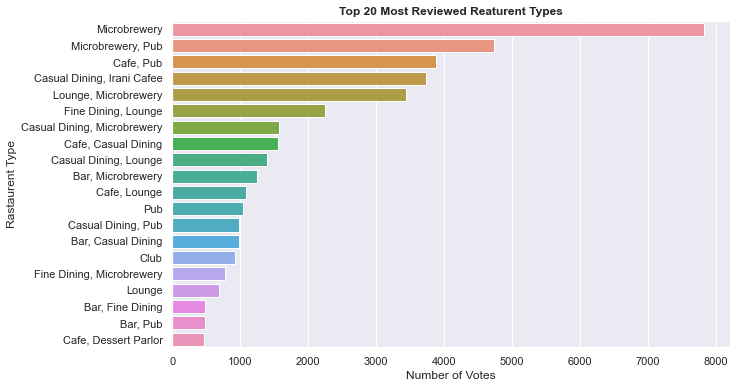

In [14]:
mean_votes = data_df.groupby(['rest_type'], as_index=False)['votes'].mean()
mean_votes.columns=['rest_type','votes']
mean_votes = mean_votes.sort_values("votes", ascending=False)
top_voted_20 = mean_votes.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x="votes", y="rest_type", data=top_voted_20,orient='h')
plt.title('Top 20 Most Reviewed Reaturent Types',weight='bold')
plt.ylabel('Rastaurent Type')
plt.xlabel('Number of Votes')
plt.show()

From the above plot we can see that Microbrewery , pub, cafe are the top 3 restuarent types that people are visiting and most voted.

Which areas of Bangalore are most populted with restuarents

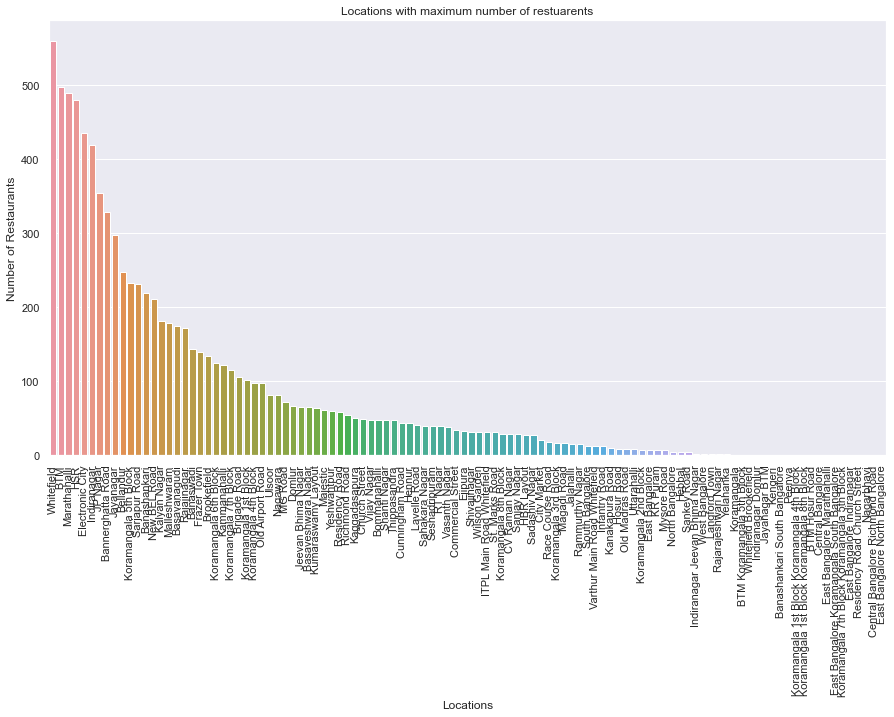

In [15]:
city_counts = data_df.groupby(['location'], as_index=False)['address'].nunique()

city_counts.columns=['location','number_of_restaurents']
city_counts = city_counts.sort_values("number_of_restaurents", ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x="location", y="number_of_restaurents", data = city_counts )
plt.xticks(rotation=90)
plt.xlabel('Locations')
plt.ylabel('Number of Restaurants')
plt.title('Locations with maximum number of restuarents')
plt.show()

Whitefield, BTM, Marathahalli and the areas where migrated people from different states reside, and these are also huge IT hubs. That could be the reason that these areas have most number of restaurents.

Chekcing data distribution of restuarents based on online order acceptance. From the below plot 40% of the restaurents do not accept online orders.

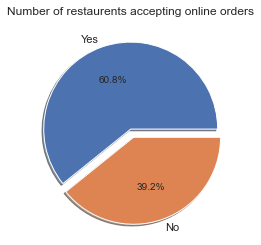

In [16]:
online_df = data_df['online_order'].value_counts()
plt.pie(online_df.values, labels=['Yes','No'], autopct='%1.1f%%', explode=(0, 0.1) ,shadow=True)
plt.title('Number of restaurents accepting online orders')
plt.show()

Chekcing data distribution of restuarents based on table booking acceptance. From the below plot only 10% of the restaurents do not accept table booking.

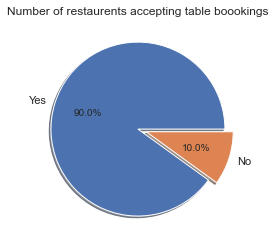

In [17]:
table_booking_df = data_df['book_table'].value_counts()
plt.pie(table_booking_df.values, labels=['Yes','No'], autopct='%1.1f%%', explode=(0, 0.1) ,shadow=True)
plt.title('Number of restaurents accepting table boookings')
plt.show()

Checking distribution of rating based on the online order acceptance vs table booking

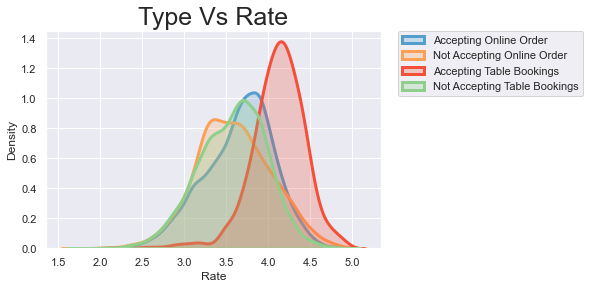

In [18]:
g = sns.distplot(data_df[data_df['online_order']==1]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Accepting Online Order',color='#539ecd')
g = sns.distplot(data_df[data_df['online_order']==0]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Not Accepting Online Order',color='#fda057')
g = sns.distplot(data_df[data_df['book_table']==1]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Accepting Table Bookings',color='#f44f39')
g = sns.distplot(data_df[data_df['book_table']==0]['rate'].values, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, label = 'Not Accepting Table Bookings',color='#8ed08b')

plt.title('Type Vs Rate', fontsize=25)
plt.xlabel('Rate')
plt.legend(['Accepting Online Order', 'Not Accepting Online Order','Accepting Table Bookings','Not Accepting Table Bookings'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Checking the most popular restaurents based on the number of outlets

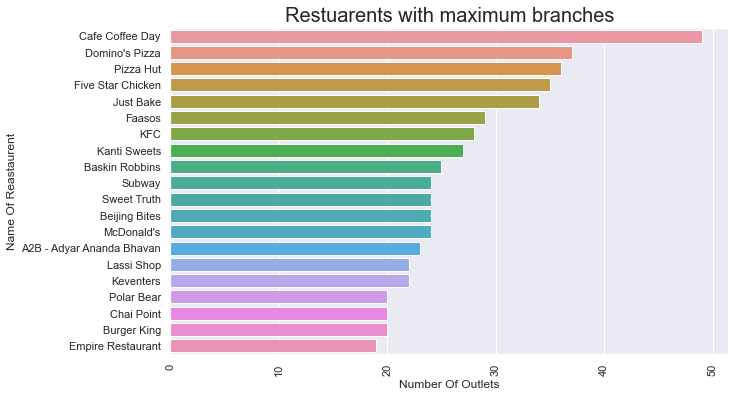

In [19]:
outlet_counts = data_df.groupby(['name'], as_index=False)['address'].nunique()

outlet_counts.columns=['name','number_of_oulets']
outlet_counts = outlet_counts.sort_values("number_of_oulets", ascending=False)
outlet_counts = outlet_counts.head(20)
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x="number_of_oulets", y="name", data=outlet_counts,orient ='h')
plt.ylabel('Name Of Reastaurent')
plt.xlabel('Number Of Outlets')
plt.title('Restuarents with maximum branches', fontsize=20)
plt.show()

Word cloud for reviews list

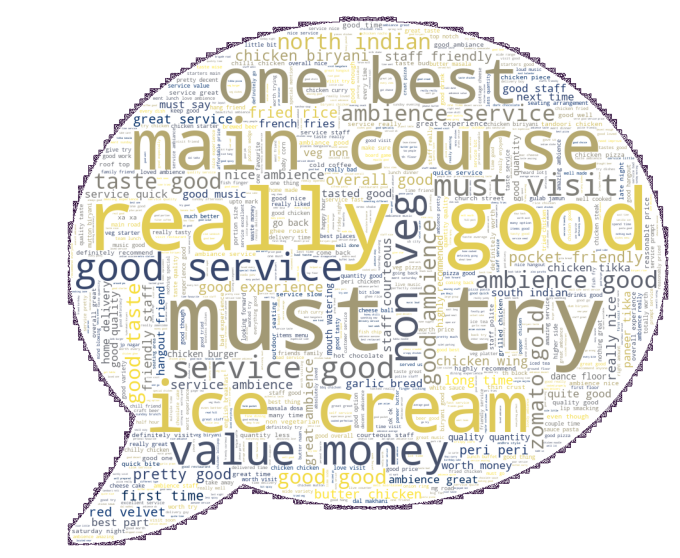

In [20]:
review_text =  " ".join(review for review in data_df.reviews_list.astype(str))
review_mask = np.array(Image.open( "data/review.jpg"))

cloud = WordCloud(background_color="white", max_words=1000, colormap='cividis_r',mask=review_mask,contour_color='#260232',contour_width=0.5)
# Generate a word cloud
cloud.generate(review_text)
# Visualize the word cloud

plt.figure( figsize=(15,10))

plt.tight_layout(pad=0)

plt.imshow(cloud)
plt.axis('off')


plt.show()

Word cloud for dished that people reviewed

In [21]:
reviewed_dishes =  " ".join(dish for dish in data_df.dish_reviewed.astype(str))

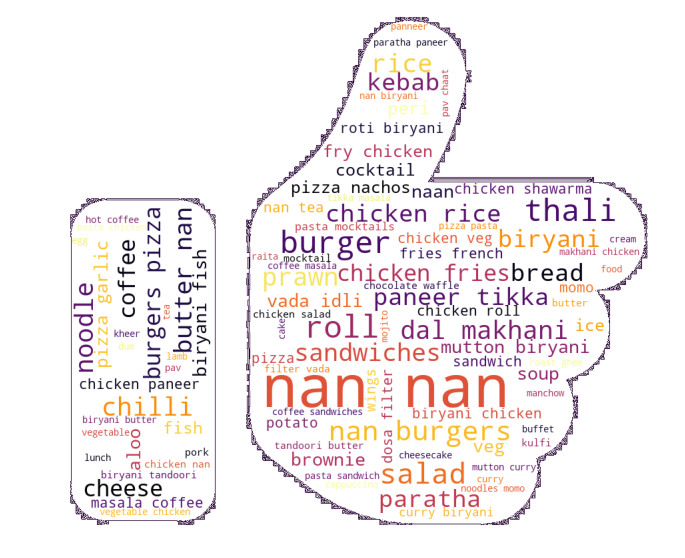

In [22]:
like_mask = np.array(Image.open( "data/like.jpg"))

# Create the wordcloud object
wordcloud = WordCloud(max_words=100,colormap='inferno',contour_color='#260232',contour_width=0.5,background_color="white",mask=like_mask).generate(reviewed_dishes)

# Display the generated image:
plt.figure( figsize=(15,10))


plt.tight_layout(pad=0)

plt.imshow(wordcloud)
plt.axis('off')

plt.show()

Word Cloud for menu items

In [23]:
menu_items =  " ".join(menu for menu in data_df.menu_item.astype(str))

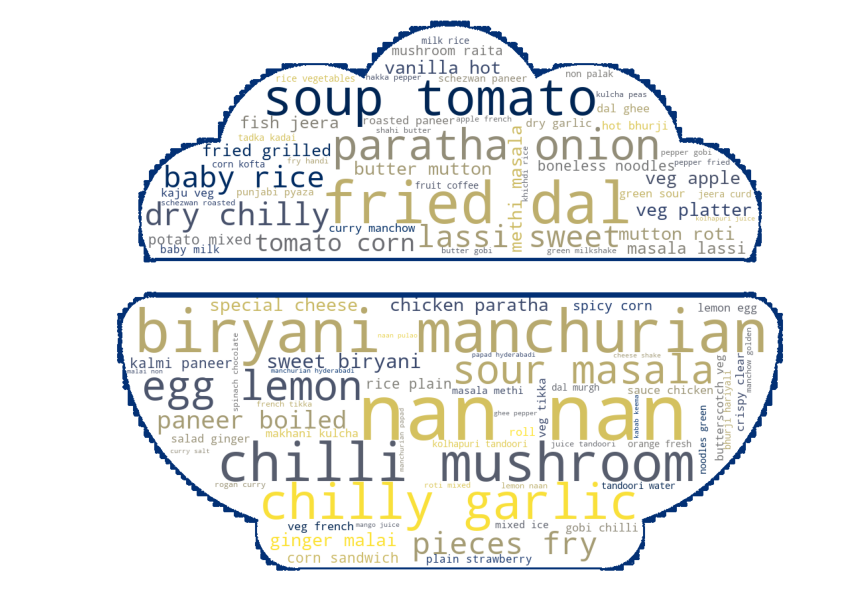

In [24]:
bowl_mask = np.array(Image.open( "data/bowl.jpg"))

# Create the wordcloud object
wordcloud = WordCloud( max_words=100,colormap='cividis',contour_color='#023075',contour_width=2,background_color="white",mask=bowl_mask).generate(menu_items)

# Display the generated image:
plt.figure( figsize=(15,20))


plt.tight_layout(pad=0)

plt.imshow(wordcloud)
plt.axis('off')

plt.show()